<a href="https://colab.research.google.com/github/jerrymart/Machine-Learning-Projects/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Packages / libraries
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

#sns.set(rc={'figure.figsize':(12,10)})

In [2]:
df = pd.read_csv('/content/PM2.5-data.csv')

In [3]:
df.head()

,NitricOxide,NitrogenDioxide,OxidesofNitrogen,Ozone,WindSpeed,ResultantWindSpeed,ResultantWindDirection,MaximumWindGust,Std.Dev.WindDirection,OutdoorTemperature,DewPointTemperature,RelativeHumidity,SolarRadiation,PM2.5
0,19.6,35.8,55.5,2,1.9,1.5,215,3.6,39,67.7,23.3,18.6,0.000,37.1
1,2.5,2.8,4.4,37,23.3,22.6,276,38.5,14,86.4,32.3,14.5,1.110,40.9
2,2.3,3.1,4.5,41,23.7,23.2,281,40.4,12,87.2,30.2,12.9,0.841,36.7
3,1.9,3.0,4.1,42,25.0,24.7,282,41.9,10,86.7,29.0,12.5,0.509,36.4
4,0.4,7.1,8.1,50,25.1,24.7,283,42.3,9,59.6,13.2,16.1,0.450,65.9


**1. EDA analysis**

(a) Obtain the histograms of both PM2.5 and the logarithm (natural base) of PM2.5
and comment. Proceed with the log-transformed PM2.5 from this step on.

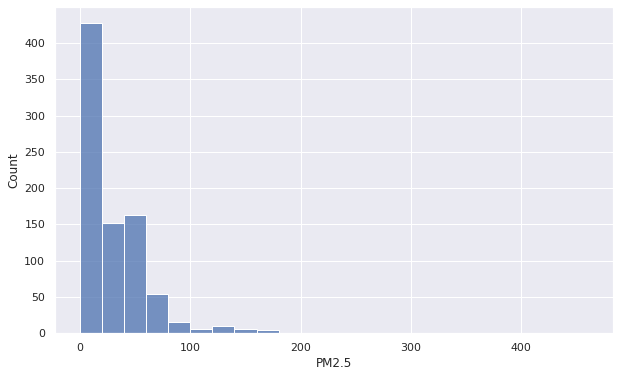

In [32]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x = 'PM2.5', binwidth = 20)

In [3]:
#Log of PM2.5

df['log_PM2.5'] = np.log(df['PM2.5'])

In [4]:
df['log_PM2.5']

0      3.613617
1      3.711130
2      3.602777
3      3.594569
4      4.188138
         ...   
840    2.701361
841    2.406945
842    2.433613
843    2.312535
844    2.140066
Name: log_PM2.5, Length: 845, dtype: float64

In [5]:
#Delete PM2.5 Column

df1 = df.drop(columns = ['PM2.5'])

In [11]:
#Inspect PM2.5 Columns
df1.head(2)

,NitricOxide,NitrogenDioxide,OxidesofNitrogen,Ozone,WindSpeed,ResultantWindSpeed,ResultantWindDirection,MaximumWindGust,Std.Dev.WindDirection,OutdoorTemperature,DewPointTemperature,RelativeHumidity,SolarRadiation,log_PM2.5
0,19.6,35.8,55.5,2,1.9,1.5,215,3.6,39,67.7,23.3,18.6,0.00,3.613617
1,2.5,2.8,4.4,37,23.3,22.6,276,38.5,14,86.4,32.3,14.5,1.11,3.711130


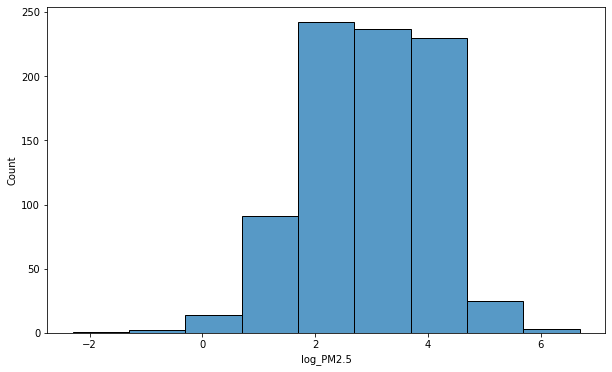

In [12]:
#Histogram of LogPM2.5

plt.figure(figsize=(10,6))
sns.histplot(data=df1,x = 'log_PM2.5', binwidth = 1)

(b) Inspect the data and answer these questions: Are there any missing data? Among
all the predictors, how many of them are continuous, integer counts, and categorical,
respectively?

In [6]:
# Checking for null values

df1.isnull().sum()

NitricOxide               2
NitrogenDioxide           0
OxidesofNitrogen          1
Ozone                     0
WindSpeed                 0
ResultantWindSpeed        0
ResultantWindDirection    0
MaximumWindGust           0
Std.Dev.WindDirection     0
OutdoorTemperature        0
DewPointTemperature       0
RelativeHumidity          0
SolarRadiation            0
log_PM2.5                 0
dtype: int64

In [7]:
# Visualize the NULL observations

df1[df1['NitricOxide'].isnull()]

,NitricOxide,NitrogenDioxide,OxidesofNitrogen,Ozone,WindSpeed,ResultantWindSpeed,ResultantWindDirection,MaximumWindGust,Std.Dev.WindDirection,OutdoorTemperature,DewPointTemperature,RelativeHumidity,SolarRadiation,log_PM2.5
25,NaN,14.0,14.0,59,10.1,9.7,282,17.1,16,82.9,13.0,7.2,0.0,4.044804
26,NaN,15.1,15.1,52,9.8,9.6,284,15.1,12,79.8,12.2,7.6,0.0,3.802208


There are few missing values


In [8]:
#Replace NAs with mean values

df1 = df1.fillna(df1.mean())

In [9]:
df1.isnull().sum()

NitricOxide               0
NitrogenDioxide           0
OxidesofNitrogen          0
Ozone                     0
WindSpeed                 0
ResultantWindSpeed        0
ResultantWindDirection    0
MaximumWindGust           0
Std.Dev.WindDirection     0
OutdoorTemperature        0
DewPointTemperature       0
RelativeHumidity          0
SolarRadiation            0
log_PM2.5                 0
dtype: int64

In [15]:
# Investigate all the elements whithin each Feature 

for column in df1:
    unique_values = np.unique(df1[column])
    number_of_values = len(unique_values)
    if number_of_values <= 10:
        print("The number of distinct values for feature {} is: {} -- {}".format(column, number_of_values, unique_values))
    else:
        print("The number of distinct values for feature {} is: {}".format(column, number_of_values))

The number of distinct values for feature NitricOxide is: 284
The number of distinct values for feature NitrogenDioxide is: 327
The number of distinct values for feature OxidesofNitrogen is: 413
The number of distinct values for feature Ozone is: 65
The number of distinct values for feature WindSpeed is: 236
The number of distinct values for feature ResultantWindSpeed is: 233
The number of distinct values for feature ResultantWindDirection is: 270
The number of distinct values for feature MaximumWindGust is: 345
The number of distinct values for feature Std.Dev.WindDirection is: 70
The number of distinct values for feature OutdoorTemperature is: 444
The number of distinct values for feature DewPointTemperature is: 340
The number of distinct values for feature RelativeHumidity is: 424
The number of distinct values for feature SolarRadiation is: 347
The number of distinct values for feature log_PM2.5 is: 432


Continuous: All predictors are continuous

Integer counts:All predictors 

Categorical: Non is categorical

In [14]:
df1.shape

(845, 14)

(c) Show a few interesting fndings about the data.

The log transform of the PM.25 is normally distributed

The unique occurence of each feature is just about the mean of total observations 